# **Optimizing a Neural Netwrok**
Optimizing a Neural Network or any modle for that matter is like tuning a radio. The difference is there might be a million knoobs to tune simultaneously.


In [ ]:
from IPython.display import Image
Image(url="https://media3.giphy.com/media/l2Je32EwtM8jUnKk8/giphy.gif")

### Overfitting and Underfitting

`Overfitting`:  is a scenario where your model performs well on training data but perform poorly on data not seen during training. This means that our model has memorized the training data instead of learning the raltionship between features and labels.

`Underfitting` : It is the opposite counterpart of overfitting wherein our model exhibits high bias. This situation can occur when our model is not sufficiently complex to capture relationship between features and labels.

Underfitting is a bit harder to diagnose. If Accuracy and Validation Accuracy are similar but are both poor, then you may be underfitting.

## # Strategies to avoid Overfitting/Underfitting

Overfitting can be handled by reducing the complexity of our model( i.e. reducing the number of trainable parameters). This is done by:

  - Use fewer layes(Shallow Networks), fewer neurons per layer(Narrow Networks)
  - Using Dropouts
  - Using Regularization
  - Early Stopping in some cases.

Underfitting can be handled by :
  - Increasing the complexity of our model i.e. increasing layerss and number   of  neurons. With more layers, the network can learn more sophisticated relationships and perhaps perform well on difficult real-world tasks.


# Using MNSIT Dataset

Simple example of how number of layers and number of neurons affect the model.

In [ ]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## To load the graph in notebook only
%matplotlib inline 

import tensorflow as tf


In [ ]:
# Load mnsit dataset from the tensorflow library

from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Label: 5
Digit in the image 0


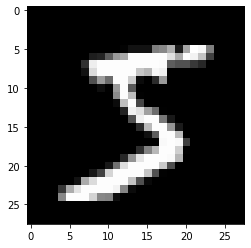

Label: 0
Digit in the image 0


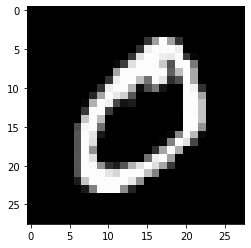

Label: 4
Digit in the image 0


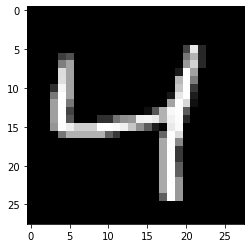

Label: 1
Digit in the image 0


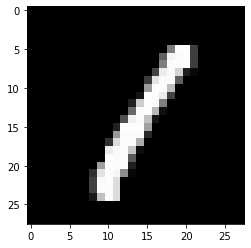

Label: 9
Digit in the image 0


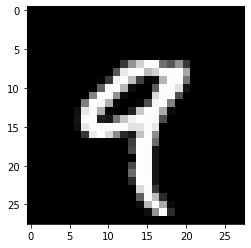

In [ ]:
# Let's check the first 5 images and corresponding labels in our training data
images = X_train[:5]
labels = y_train[:5]

for index, image in enumerate(images):
  print('Label:', labels[index])
  #argmax picks out the label with highest probability
  print('Digit in the image', np.argmax(labels[index]))
  plt.imshow(image.reshape(28,28), cmap='gray')
  plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

## TensorBoard For Visualization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from datetime import datetime


# Why did we reshaped ?

As it Flattens images to 1-D vector of 784 features (28*28) i.e., it coverts the 2-D NumPy array of dimension 28*28 to a 1-D array of length 784


In [ ]:
## Reshaping of the train and test dataset 

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# What is the purpose of to_categorical ?

converts a class vector(integers) to binary class matrix.

`Syntax`: to_categorical(y, num_calsses=NULL, dtype="float32")
  - y: class vector to be converted into matrix
  - num_classes: Total  number of classes
  - dtype: The data type expexted by  the input,as a string.

In [ ]:
# Using to_categorical to converts the vetcor to binary class matrix

y_train  = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## `Neural Network with only one input and output layer`

In [ ]:
## Sequential just symbolises

model = Sequential()

# Input Layer
model.add(Dense(50, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


We have used softmax as activation function because this is a multiclass classification.


In [ ]:
# For tensorboard visualization we can check out the following : https://www.youtube.com/watch?v=Uzkhn5ENJzQ&feature=youtu.be

logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir = logdir)


In [ ]:
training_history = model.fit(
    X_train, # input
    y_train, # output
    batch_size= 32,
    verbose=1, # Suppress chatty output; use Tensorboard instead
    epochs=10, 
    validation_data=(X_test,y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0283 - accuracy: 0.5056 - val_loss: 1.1739 - val_accuracy: 0.6138
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9895 - accuracy: 0.6935 - val_loss: 0.7985 - val_accuracy: 0.8013
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7143 - accuracy: 0.8028 - val_loss: 0.6424 - val_accuracy: 0.8037
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5581 - accuracy: 0.8486 - val_loss: 0.5833 - val_accuracy: 0.8547
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4871 - accuracy: 0.8680 - val_loss: 0.5737 - val_accuracy: 0.8651
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4433 - accuracy: 0.8823 - val_loss: 0.4568 - val_accuracy: 0.8871
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4187 - accuracy: 0.8876 - val_loss: 0.4578 - val_accuracy:

The relative tensorboard graph is below. The maximum accuracy achieved is 0.90. If we train it for longer (for more epochs) maybe the accuracy will increase.

![underfitting_validation.JPG](https://drive.google.com/uc?export=view&id=1N7odof3bwAVOwbbm73_CdKbH3gWMkp4Z)

## `Adding many layers to the model`

In [ ]:
model2 = Sequential()

# 10 Neurons layer
model2.add(Dense(10, activation='relu',input_shape=(784,) ))

# Many 512 Neuron Layer
# Change the number of layers (Increase or Decrease)

model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', 
               optimizer=SGD(lr=0.001),
               metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir = logdir)

In [ ]:
training_history= model2.fit(
    X_train, # input
    y_train, # output
    batch_size = 32,
    verbose=1, # Suppress chatty output; use TensorBoard instead
    epochs= 10,
    validation_data=(X_test,y_test),
    callbacks=[tensorboard_callback] )

Epoch 1/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.6485 - accuracy: 0.7901 - val_loss: 0.3912 - val_accuracy: 0.8720
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3169 - accuracy: 0.9002 - val_loss: 0.2919 - val_accuracy: 0.9076
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2479 - accuracy: 0.9223 - val_loss: 0.2443 - val_accuracy: 0.9247
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2157 - accuracy: 0.9323 - val_loss: 0.2100 - val_accuracy: 0.9369
Epoch 5/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.1917 - accuracy: 0.9395 - val_loss: 0.1956 - val_accuracy: 0.9411
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1749 - accuracy: 0.9447 - val_loss: 0.1885 - val_accuracy: 0.9421
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1602 - accuracy: 0.9493 - val_loss: 0.1915 -

![over_fitting](https://drive.google.com/uc?export=view&id=16YqSkIgM-exFGTX6drUMGjyBNjod7q6f)

---

`Conclusion`

It is clearly visible deep networks have better accuracy and vice versa. Adding more layers increases the accuracy but it might lead to **Overfitting** or **Generalisation Error**.

## Early Stopping

When training a large network, there will be a point during training when the model will stop generalizing and start learning the statistical noise in the training dataset.

This overfitting of the training dataset will result in an increase in generalization error, making the model less useful at making predictions on new data.

EarlyStopping basically stops training at the point when performance on a validation dataset starts to degrade. (It would by default need a validation set to be able to work).


How to get through this:
  - Either limit the number of Epoch (not preferred)
  - Use EarlyStoppingt Criteria(preferred)


```python
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
```
`monitor` :  you can choose any metric to monitor like val_loss, val_acc. <br>
`mode` :  by default it is auto and knows that you want to minimize loss or maximize accuracy. like *min* in case of val_loss. <br>
`patience`: patience is the number to epochs to wait before stopping it. ex -  If we are chasing *val_loss* and we it is not reducing from the last 50 epoch we stop the training if patience is 50.<br>

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_cross', mode='min', 
                   verbose=1, patience=5)

In [ ]:
model3= Sequential()

model3.add(Dense(128, activation='relu', input_shape=(784,)))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', 
               optimizer=SGD(lr=0.001),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

In [ ]:
training_history =model3.fit(
    X_train, # input
    y_train, # output
    batch_size = 32,
    verbose = 1, # Suppress chatty output; use Tensorboard instead
    epochs = 10, 
    validation_data = (X_test, y_test),
    callbacks = [tensorboard_callback,es]

)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0186 - accuracy: 0.9957 - val_loss: 0.1837 - val_accuracy: 0.9573
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0165 - accuracy: 0.9967 - val_loss: 0.1835 - val_accuracy: 0.9599
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0145 - accuracy: 0.9973 - val_loss: 0.1859 - val_accuracy: 0.9590
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0132 - accuracy: 0.9975 - val_loss: 0.1868 - val_accuracy: 0.9593
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0119 - accuracy: 0.9979 - val_loss: 0.1839 - val_accuracy: 0.9613
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0108 - accuracy: 0.9983 - val_loss: 0.1878 - val_accuracy: 0.9593
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0095 - accuracy: 0.9987 - val_loss: 0.1879 - val_accuracy:

### Regularization

Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well. 

By adding more layers to the model (making it more complex) ? Adding more than required layers might also lead to overfitting. 

Graph below helps to understand what can be the ideal model.

![perfect_point.png](https://drive.google.com/uc?export=view&id=1isDRyvRtMFPhC8RQHL9Puh-OoOm0z9FP)

Here is how to use it in your neural networks.
```python
model.add(Dense(256,activation='relu', kernel_regularizer = 'l2'))
```

### Dropouts

Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel. As mentioned, it is preferrably used when training a large neural network. 

In [ ]:
from IPython.display import Image
Image(url="https://miro.medium.com/max/1200/1*iWQzxhVlvadk6VAJjsgXgg.png", width=800, height=500)

*By dropping a unit out, we mean temporarily removing it from the network, along with all its incoming and outgoing connections*


In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [ ]:
model4 = Sequential()
model4.add(Dense(10, activation='relu', input_shape= (784,) ))
model4.add(Dropout(0.2)) ###using dropout
model4.add(Dense(256,activation='relu', kernel_regularizer = 'l2'))###using regularizer
model4.add(Dropout(0.2))###using dropout
model4.add(Dense(256,activation='relu', kernel_regularizer = 'l2')) ###using regularizer
model4.add(Dropout(0.2))###using dropout
model4.add(Dense(10, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
training_history = model.fit(
    X_train, # input
    y_train, # output
    batch_size=32,
    verbose=1, # Suppress chatty output; use Tensorboard instead
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback, es],
)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3468 - accuracy: 0.9067 - val_loss: 0.4167 - val_accuracy: 0.9028
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3331 - accuracy: 0.9091 - val_loss: 0.3973 - val_accuracy: 0.9056
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3262 - accuracy: 0.9115 - val_loss: 0.3776 - val_accuracy: 0.9115
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3131 - accuracy: 0.9147 - val_loss: 0.3547 - val_accuracy: 0.9174
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3077 - accuracy: 0.9166 - val_loss: 0.3519 - val_accuracy: 0.9173
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2996 - accuracy: 0.9178 - val_loss: 0.3770 - val_accuracy: 0.9125
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2935 - accuracy: 0.9198 - val_loss: 0.3715 - val_accuracy:

#### Why not just use early stopping rather than regularisation ?

The main downside of early stopping is that this couples two tasks:

1. Algorithm to optimize the cost function j (eg gradient descent, adam etc)
2. Prevent overfitting (ie get more data, regularization)

because by stopping gradient decent early, we are sort of breaking whatever we are doing to optimize cost function J and simultaneously trying to not over fit.

**Points to conclude with**

- Large weights in a neural network are a sign of a more complex network that has overfit the training data.
- Probabilistically dropping out nodes in the network is a simple and effective regularization method.
- A large network with more training and the use of a weight constraint are suggested when using dropout.